#Grover's Search Algorithm

Grover's algorithm is a quantum computing algorithm often cited as a searching algorithm superior to its classical counterparts.

You've likely encountered the linear search algorithm before: you're provided with a sorted dataset, and your task is to continually search for the target data point until you locate it.
In this classical approach, the time complexity is directly proportional to the dataset's size. However, Grover's search algorithm introduces a remarkable quadratic acceleration to the search process.

Say you have a set of $N$ boxes, with one containing a prize. To find the winning item -- the marked item -- using classical computation, one would have to check on average $N/2$ of these boxes, and in the worst case, all $N$ of them.

On a quantum computer, however, we can find the marked item in roughly $\sqrt{N}$ steps with Grover's amplitude amplification trick. A quadratic speedup is indeed a substantial time-saver for finding marked items in long lists. Additionally, the algorithm does not use the list's internal structure, which makes it generic; this is why it immediately provides a quadratic quantum speed-up for many classical problems.

Each box in the list is mapped as a possible state of qubits (e.g 8 (2^N) boxes need 3 qubits to be represented) and hence has a $1/\sqrt{N}$ probability of being the one we are looking for. Amplitude of the desired state is amplified which results in amplitude shrinkage of others so that each of the probabilities add up to unity.

Now that we have amplified the amplitude, we apply the reflection oracle which basically adds negative phase to the solution state.

For $|X\rangle$, oracle is defined as:
$U_ω|x⟩ = \begin{equation*}
\left\{
        \begin{array}{ll}
            |x⟩ & x \neq ω \\
            |x⟩ & x = ω
        \end{array}
    \right.
\end{equation*}
$
So graphically, the solution state has been reflected as follows:

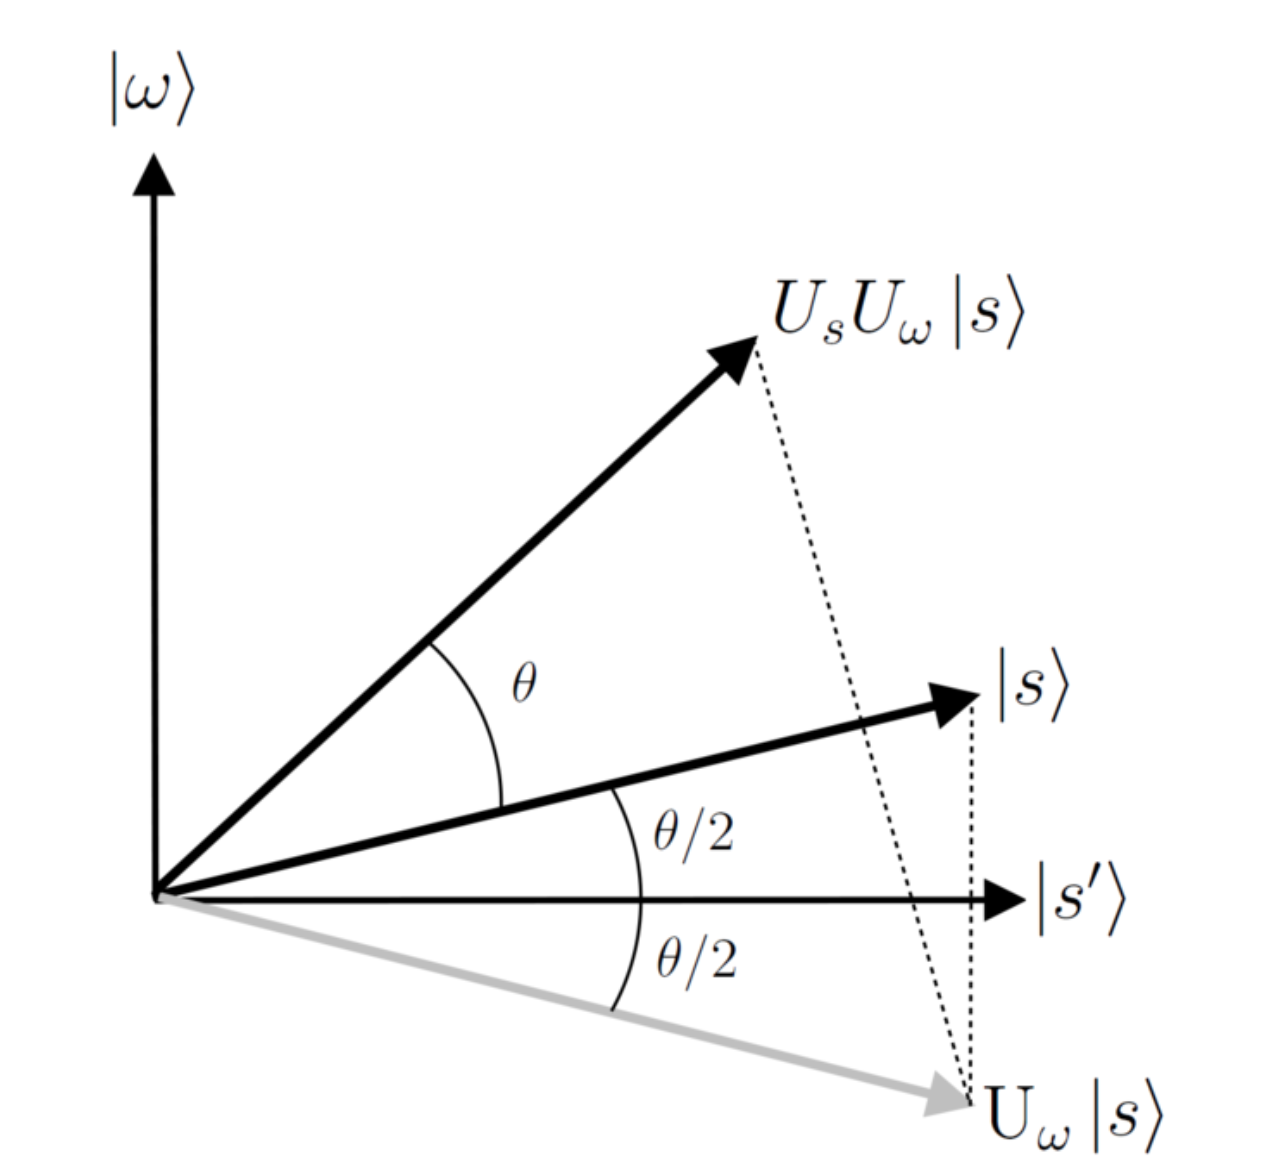



As we iterate the steps (amplitude amplification and reflect oracle) the probability of solution state after measurement reaches ideally close to 1  (number of iteration doesn't affect time complexity).  Now, let us try to implement our understanding using simple Qiskit codes:

In [ ]:
!pip install qiskit
!pip install qiskit-ibmq-provider
!pip install qiskit-aer
!pip install pylatexen


import numpy as np
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pylatexen (from versions: none)
ERROR: No matching distribution found for pylatexen


In [ ]:
from qiskit import IBMQ

# Load your IBM Quantum account:
IBMQ.save_account('106701415c7ca974e86c0c32e6153410cb982ba6a6e3e6369f0d9787535cc973fcf79bb738c3f99160286604f8c4f51fc4d79cbcfbecf13bbfbd915453a948ee')



provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

<ipython-input-2-15f1b035795d>:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('106701415c7ca974e86c0c32e6153410cb982ba6a6e3e6369f0d9787535cc973fcf79bb738c3f99160286604f8c4f51fc4d79cbcfbecf13bbfbd915453a948ee')


###Step 0: Creating $|s\rangle$
The amplitude amplification starts out in the uniform superposition $|s\rangle$

In [ ]:
qc = QuantumCircuit(2)

#Ex 1.1: create |s> by creating uniform superposition on BOTH qubits
qc.h(0)
qc.h(1)
qc.barrier()

qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     └───┘ ░

###Step 1: Marking $|11\rangle$

Let's try to find the position of desired state (in this case) |11>:

Here we try to understand how can we make an oracle for the required state:

The oracle to mark the state $|11⟩$ is: $U_ω = \frac{1}{2}(|00⟩+|01⟩+|10⟩-|11⟩)$

Looking more closely we will be able to recognize that using the controlled Z gate on the state equally superposition state of $|00⟩$ we can achieve this state.





In [ ]:
#Ex 1.2: Mark |11> using CZ gate
qc.cz(0,1)
qc.barrier()
qc.draw()

┌───┐ ░     ░ 
q_0: ┤ H ├─░──■──░─
     ├───┤ ░  │  ░ 
q_1: ┤ H ├─░──■──░─
     └───┘ ░     ░

###Step 2: Inversion about Average
Next, we set up the circuit for inversion about the average as we saw in Step 2. This circuit is sometimes called an amplitude ampification module or a diffusion circuit.

In [ ]:
qc.h(range(2))
qc.x(range(2))
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x(range(2))
qc.h(range(2))
qc.barrier()

In [ ]:
qc.draw()

┌───┐ ░     ░ ┌───┐┌───┐          ┌───┐┌───┐      ░ 
q_0: ┤ H ├─░──■──░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░─
     ├───┤ ░  │  ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░ 
q_1: ┤ H ├─░──■──░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░     ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░

##Step 3: Measurement
Measure both our qubits!

In [ ]:
#Measure all qubits
qc.measure_all()
qc.draw()

┌───┐ ░     ░ ┌───┐┌───┐          ┌───┐┌───┐      ░  ░ ┌─┐   
   q_0: ┤ H ├─░──■──░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────░──░─┤M├───
        ├───┤ ░  │  ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ░ └╥┘┌─┐
   q_1: ┤ H ├─░──■──░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──░──╫─┤M├
        └───┘ ░     ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ░  ║ └╥┘
meas: 2/════════════════════════════════════════════════════════╩══╩═
                                                                0  1

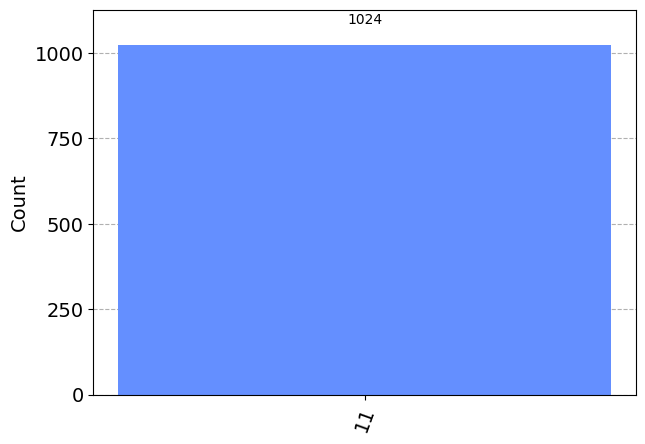

In [ ]:
#Run on a simulator


backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
#Ex 1.3: Run it on a real device!
from qiskit import QuantumCircuit, transpile, assemble, IBMQ

# Load IBM Quantum account
IBMQ.load_account()


ibmqfactory.load_account:WARNING:2023-11-09 17:32:52,648: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:


# Get the provider
provider = IBMQ.get_provider(hub='ibm-q')

# Print the names of available backends
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
# Choose a quantum device (replace 'ibm_backend_name' with the name of the backend you want to use)
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_nairobi')

In [ ]:
# Transpile the circuit for the chosen backend
transpiled_qc = transpile(qc, backend)

In [ ]:
# Assemble the transpiled circuit for execution
qobj = assemble(transpiled_qc)


In [ ]:

# Submit the job to the backend
job = backend.run(qobj)


<ipython-input-14-db296de8ce75>:2: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


In [2]:

# Monitor the job status
from qiskit.tools.monitor import job_monitor
job_monitor(job)

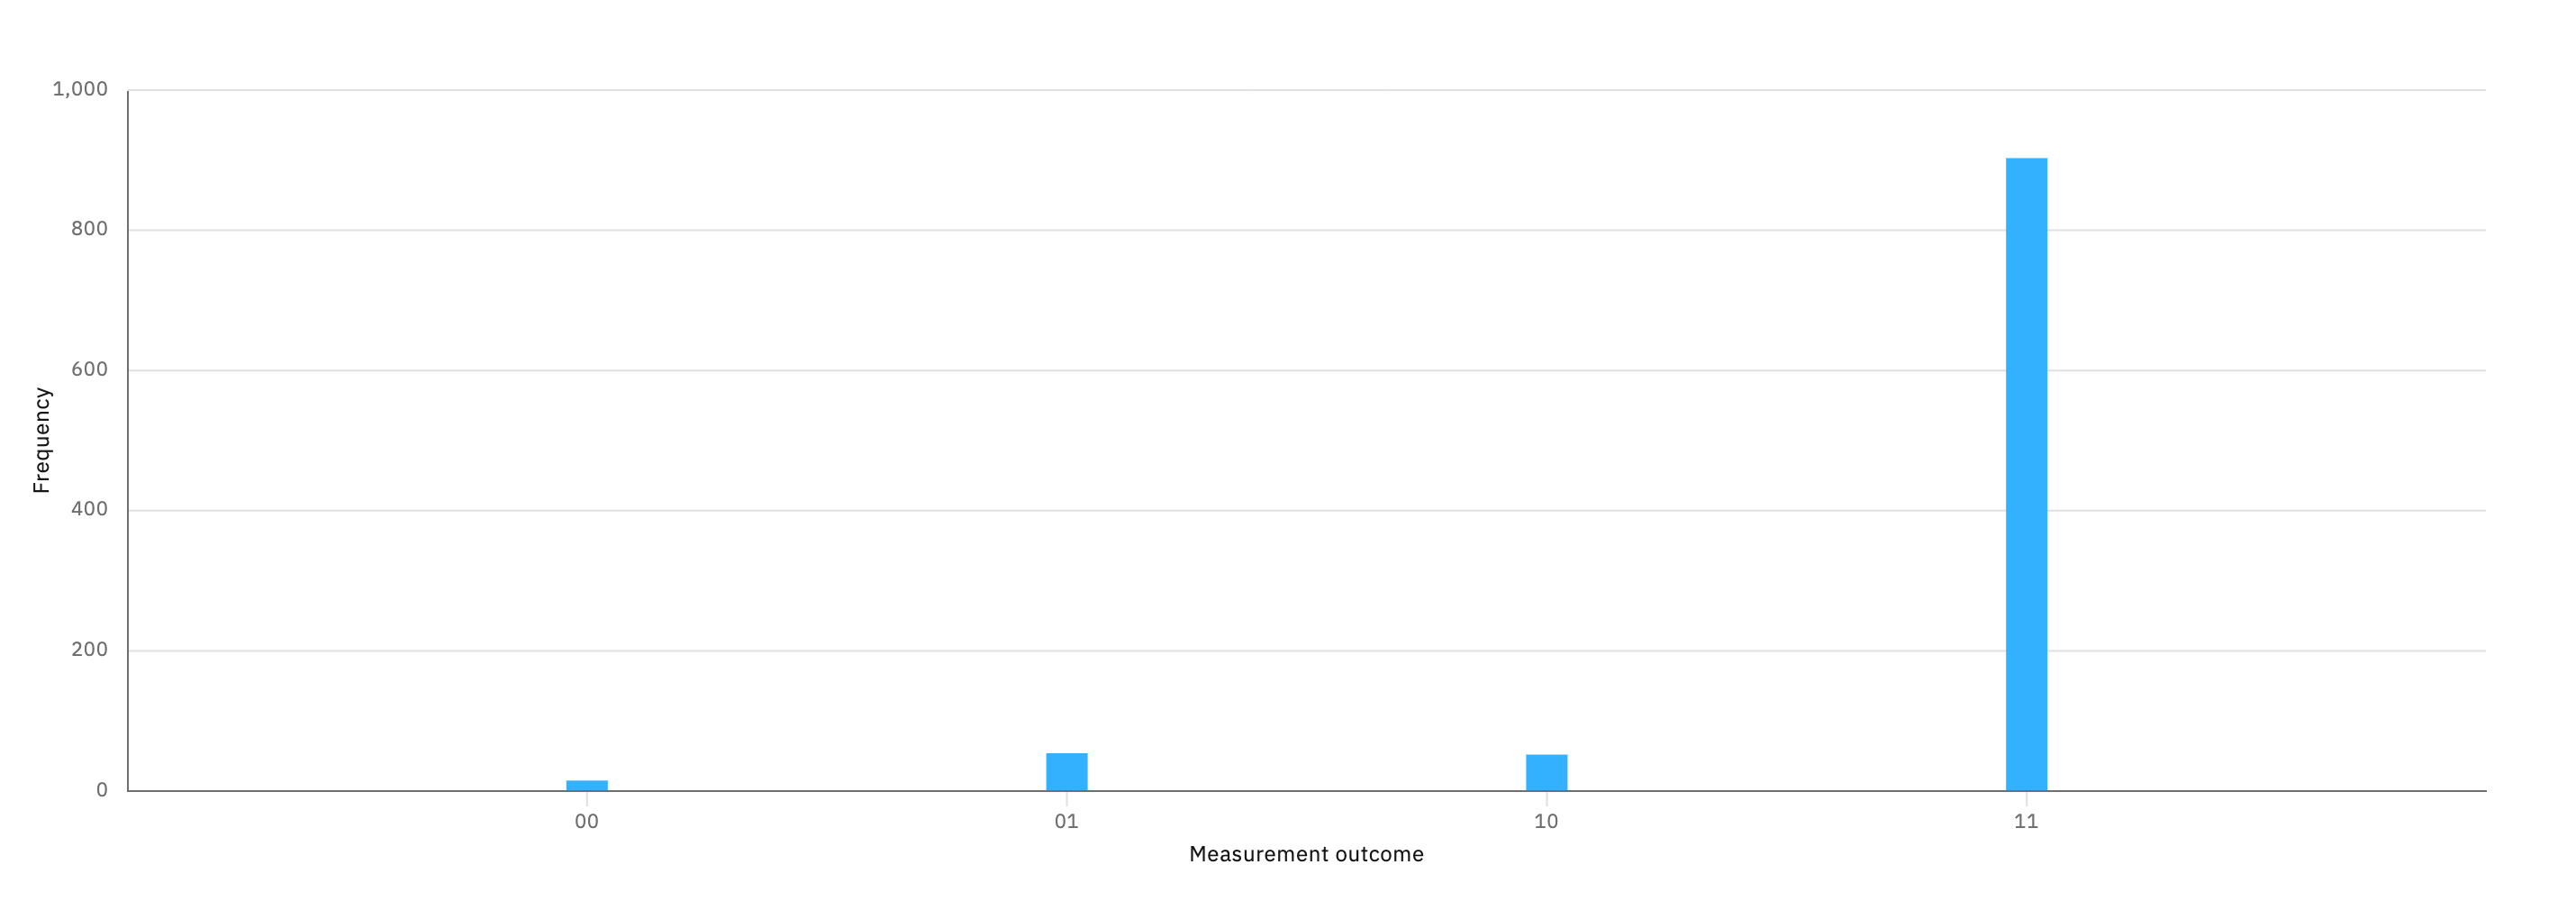

We did it, we ran our Grover's algorithm!